# Submission Notebook

# Reddit Data Exploration

In [1]:
#import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
#load data into dataframe
filename="reddit_wsb.csv"
#filename="reddit_wsb_20_march_short.csv"
reddit_posts=pd.read_csv(filename,)
reddit_posts['timestamp']=pd.to_datetime(reddit_posts['timestamp'])
reddit_posts.drop(columns=['id','created'],inplace=True)# created column is stored as timestamp so redundant, id not useful
reddit_posts.rename(columns={'comms_num':'No of comments'},inplace=True)
reddit_posts.head()

,title,score,url,No of comments,body,timestamp
0,"It's not about the money, it's about sending a...",55,https://v.redd.it/6j75regs72e61,6,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,https://v.redd.it/ah50lyny62e61,23,NaN,2021-01-28 21:32:10
2,Exit the system,0,https://www.reddit.com/r/wallstreetbets/commen...,47,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,https://sec.report/Document/0001193125-21-019848/,74,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,https://i.redd.it/4h2sukb662e61.jpg,156,NaN,2021-01-28 21:26:56


In [3]:
#extract useful info from timestamp
reddit_posts['Day of month']=reddit_posts['timestamp'].dt.day
reddit_posts['Day number of week']=reddit_posts['timestamp'].dt.weekday
#Day number of week dictionary below (for reference only, declared as a variable later on)
#day_number_of_week_to_name={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
reddit_posts['Day of week'] = reddit_posts['timestamp'].apply(lambda x: parse(str(x)).strftime("%A"))
reddit_posts_timestamp_index=reddit_posts.set_index('timestamp')
reddit_posts_timestamp_index.sort_index(inplace=True)
reddit_posts_timestamp_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42713 entries, 2020-09-29 03:46:56 to 2021-03-20 19:55:00
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               42713 non-null  object
 1   score               42713 non-null  int64 
 2   url                 42713 non-null  object
 3   No of comments      42713 non-null  int64 
 4   body                20538 non-null  object
 5   Day of month        42713 non-null  int64 
 6   Day number of week  42713 non-null  int64 
 7   Day of week         42713 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.9+ MB


In [4]:
#Unclean dataset with first timestamp very different from rest. Will delete that record
reddit_posts_timestamp_index=reddit_posts_timestamp_index.loc['2021-01-01': ]

## Introductory data exploration

Remove duplicates.

Explore the data to see how many posts have a body (if not, it indicates the post was a link to an external page, video or image)

In [5]:
orig_length=len(reddit_posts_timestamp_index)
if len(reddit_posts_timestamp_index[reddit_posts_timestamp_index.duplicated()])==0:
    print("No duplicates")
else:
    #print(reddit_posts_timestamp_index[reddit_posts_timestamp_index.duplicated()])    
    reddit_posts_timestamp_index=reddit_posts_timestamp_index.drop_duplicates()
    print(str(orig_length-len(reddit_posts_timestamp_index)) +" duplicates removed")

4 duplicates removed


In [6]:
print(str(reddit_posts_timestamp_index.count()['body']/len(reddit_posts_timestamp_index)*100)+"% are text posts")

48.08700945958603% are text posts


For now, we'll only anlayse text posts

In [7]:
reddit_posts_text=reddit_posts_timestamp_index[reddit_posts_timestamp_index['body'].notna()]
#generate column with body and title length
reddit_posts_text['body length']=reddit_posts_text['body'].apply(lambda x: len(x.split()))
reddit_posts_text['title length']=reddit_posts_text['title'].apply(lambda x: len(x.split()))

<ipython-input-7-1345a6ea6c43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_posts_text['body length']=reddit_posts_text['body'].apply(lambda x: len(x.split()))
<ipython-input-7-1345a6ea6c43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_posts_text['title length']=reddit_posts_text['title'].apply(lambda x: len(x.split()))


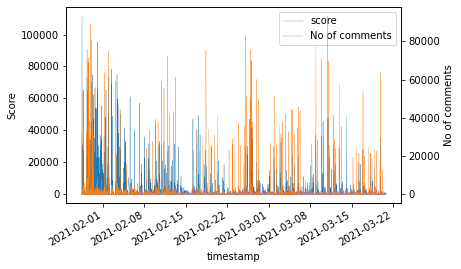

In [8]:
#plot timeseries data
ax = reddit_posts_text.plot(secondary_y=["No of comments"], linewidth=0.3)

ax.set_ylabel("Score");
ax.legend(["score","No of comments"], loc="upper right")
ax.right_ax.set_ylabel("No of comments");

Let's plot a historgram showing the frequency of posts with certain scores.

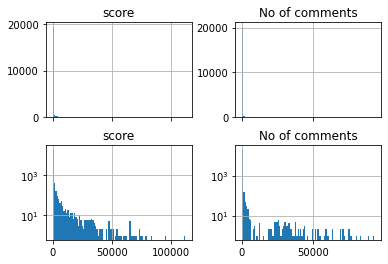

In [9]:
fig, ax = plt.subplots(2, 2, sharex='col')

#plot subplots for score and comments with log and linear y axis
log_value=False
column_value='score'
for i in range(2):
    for j in range(2):
        reddit_posts_text.hist(column=column_value,bins=100, log=log_value, ax=ax[i,j])
        if column_value == 'score':
            column_value = 'No of comments'
        else:
            column_value = 'score'
    log_value = not log_value 
    
#Uncomment to see graphs in full size rather than in parts

#reddit_posts_text.hist(column='score',bins=100)
#reddit_posts_text.hist(column='score',bins=100, log=True)
#reddit_posts_text.hist(column='No of comments',bins=100)
#reddit_posts_text.hist(column='No of comments',bins=100, log=True)


Let's zoom in on certain parts of the range of scores and comments.

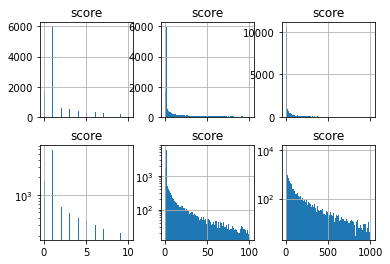

In [10]:
fig, ax = plt.subplots(2, 3, sharex='col' )

#plot subplots for score with log and linear y axis and different ranges of x to generate more useful plots

log_value=False
column_value='score'
max_value={0:10,1:100,2:1000}
for i in range(2):
    for j in range(3):
        reddit_posts_text[reddit_posts_text[column_value].between(0,max_value.get(j))].hist(column=column_value,bins=100, log=log_value, ax=ax[i,j])        
    log_value = not log_value 

#Uncomment to see graphs in full size rather than in parts

#reddit_posts_text[reddit_posts_text['score'].between(0,10)].hist(column='score',)
#reddit_posts_text[reddit_posts_text['score'].between(0,100)].hist(column='score',bins=25)
#reddit_posts_text[reddit_posts_text['score'].between(0,1000)].hist(column='score',bins=25)
#reddit_posts_text[reddit_posts_text['score'].between(0,10)].hist(column='score', log =True)

#reddit_posts_text[reddit_posts_text['score'].between(0,100)].hist(column='score',bins=25, log=True)
#reddit_posts_text[reddit_posts_text['score'].between(0,1000)].hist(column='score',bins=25, log=True)


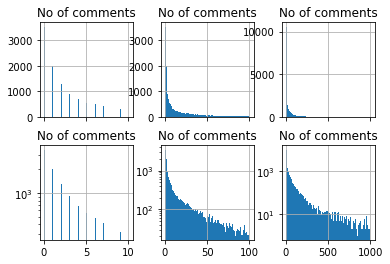

In [11]:
fig, ax = plt.subplots(2, 3, sharex='col' )

#plot subplots for no of comments with log and linear y axis and different ranges of x to generate more useful plots

log_value=False
column_value='No of comments'
max_value={0:10,1:100,2:1000,}
for i in range(2):
    for j in range(3):
        reddit_posts_text[reddit_posts_text[column_value].between(0,max_value.get(j))].hist(column=column_value,bins=100, log=log_value, ax=ax[i,j])        
    log_value = not log_value 

#Uncomment to see graphs in full size rather than in parts

#if len(reddit_posts_text[reddit_posts_text['No of comments'].between(0,10)])!=0:
#    reddit_posts_text[reddit_posts_text['No of comments'].between(0,10)].hist(column='No of comments')

#reddit_posts_text[reddit_posts_text['No of comments'].between(0,100)].hist(column='No of comments',bins=25)

#reddit_posts_text[reddit_posts_text['No of comments'].between(0,1000)].hist(column='No of comments',bins=25)
#if len(reddit_posts_text[reddit_posts_text['No of comments'].between(0,10)])!=0:
    #reddit_posts_text[reddit_posts_text['No of comments'].between(0,10)].hist(column='No of comments',log=True,)
#reddit_posts_text[reddit_posts_text['No of comments'].between(0,100)].hist(column='No of comments',bins=25, log=True)
#reddit_posts_text[reddit_posts_text['No of comments'].between(0,1000)].hist(column='No of comments',bins=25, log=True)

<AxesSubplot:xlabel='score', ylabel='No of comments'>

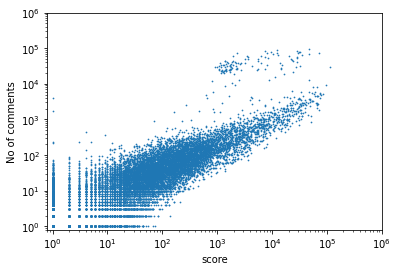

In [12]:
#plot scatter graph of score and no of comments
#uncomment below to see plot with linear axis. Note, this plot not too useful
#reddit_posts_text.plot(kind='scatter', x='score', y='No of comments',s=0.5)
reddit_posts_text.plot(kind='scatter', x='score', y='No of comments',loglog=True, s=0.5, xlim=(10**-0.1,10**6), ylim=(10**-0.1,10**6))

From timeseries plot above, there are periods where posts get low scores etc. Let's explore posts by day of the week. 

<AxesSubplot:xlabel='Day of week'>

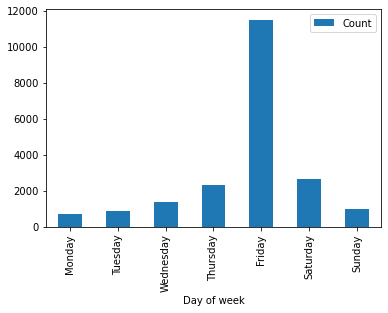

In [13]:
#create historgram showing number of posts for each day of week

reddit_posts_text_group_by_day=reddit_posts_text.groupby('Day number of week').count()
reddit_posts_text_group_by_day=reddit_posts_text_group_by_day.drop(columns=['title','url','body','Day of month','No of comments','Day of week'])
reddit_posts_text_group_by_day.rename(columns={'score':'Count'},inplace=True)
reddit_posts_text_group_by_day.reset_index(inplace=True)
day_number_of_week_to_name={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
reddit_posts_text_group_by_day['Day of week'] = reddit_posts_text_group_by_day['Day number of week'].apply(lambda x: day_number_of_week_to_name.get(x) )
reddit_posts_text_group_by_day.plot.bar(x='Day of week', y='Count')


Clearly, most of the posts are posted on Friday.

From histograms above showing score and comments, clearly a large number of posts have very few of either.

Let's filter out the posts with few comments and a low score

In [14]:
reddit_posts_text_score_more_than_50=reddit_posts_text[reddit_posts_text['score']>50]
reddit_posts_text_comments_more_than_20_and_score_more_than_50=reddit_posts_text_score_more_than_50[reddit_posts_text_score_more_than_50['No of comments']>20]
print(str(len(reddit_posts_text_comments_more_than_20_and_score_more_than_50)/len(reddit_posts_text)*100)+"% of posts gain decent traction")

26.30861372157569% of posts gain decent traction


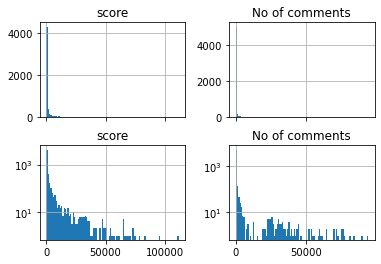

In [15]:
fig, ax = plt.subplots(2, 2, sharex='col')

#plot subplots for score and comments with log and linear y axis
log_value=False
column_value='score'
for i in range(2):
    for j in range(2):
        reddit_posts_text_comments_more_than_20_and_score_more_than_50.hist(column=column_value,bins=100, log=log_value, ax=ax[i,j])
        if column_value == 'score':
            column_value = 'No of comments'
        else:
            column_value = 'score'
    log_value = not log_value 


#reddit_posts_text_comments_more_than_20_and_score_more_than_50.hist(column='No of comments',bins=100,log=True)
#reddit_posts_text_comments_more_than_20_and_score_more_than_50.hist(column='score',bins=100,log=True)

<AxesSubplot:xlabel='Day of week'>

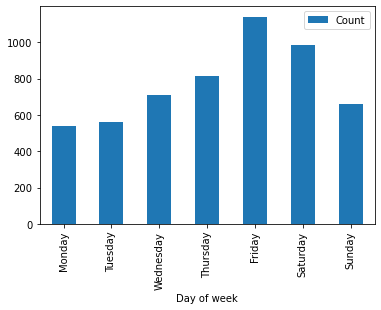

In [16]:
#create historgram showing number of posts for each day of week using filtered dataset


reddit_posts_text_comments_more_than_20_and_score_more_than_50_group_by_day=reddit_posts_text_comments_more_than_20_and_score_more_than_50.groupby('Day number of week').count()
reddit_posts_text_comments_more_than_20_and_score_more_than_50_group_by_day=reddit_posts_text_comments_more_than_20_and_score_more_than_50_group_by_day.drop(columns=['title','url','body','Day of month','No of comments','Day of week'])
reddit_posts_text_comments_more_than_20_and_score_more_than_50_group_by_day.rename(columns={'score':'Count'},inplace=True)
reddit_posts_text_comments_more_than_20_and_score_more_than_50_group_by_day.reset_index(inplace=True)
day_number_of_week_to_name={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
reddit_posts_text_comments_more_than_20_and_score_more_than_50_group_by_day['Day of week'] = reddit_posts_text_comments_more_than_20_and_score_more_than_50_group_by_day['Day number of week'].apply(lambda x: day_number_of_week_to_name.get(x) )
reddit_posts_text_comments_more_than_20_and_score_more_than_50_group_by_day.plot.bar(x='Day of week', y='Count')

<AxesSubplot:xlabel='score', ylabel='No of comments'>

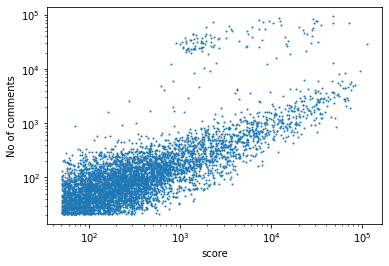

In [17]:
#plot scatter graph of score and no of comments (filtered dataset)

reddit_posts_text_comments_more_than_20_and_score_more_than_50.plot(kind='scatter', x='score', y='No of comments', s=1, logy=True, logx=True)


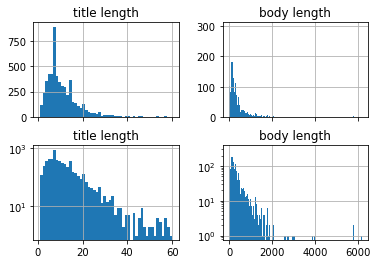

In [18]:
fig, ax = plt.subplots(2, 2, sharex='col')

log_value=False
column_value='title length'
bins_value=50
for i in range(2):
    for j in range(2):
        reddit_posts_text_comments_more_than_20_and_score_more_than_50.hist(column=column_value,bins=bins_value, log=log_value, ax=ax[i,j])
        if column_value == 'title length':
            column_value = 'body length'
            bins_value=500
        else:
            column_value = 'title length'
            bins_value=50
    log_value = not log_value 

#reddit_posts_text_comments_more_than_20_and_score_more_than_50.hist('title length', bins=50)
#reddit_posts_text_comments_more_than_20_and_score_more_than_50.hist('title length', bins=50, log=True)
#reddit_posts_text_comments_more_than_20_and_score_more_than_50.hist('body length', bins=500)
#reddit_posts_text_comments_more_than_20_and_score_more_than_50.hist('body length', bins=500, log=True)

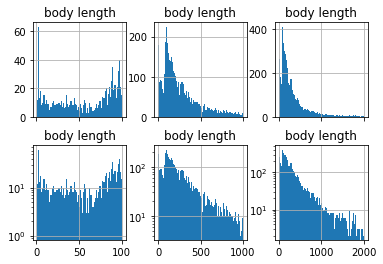

In [19]:
fig, ax = plt.subplots(2, 3, sharex='col' )
#histograms of body length (no of characters)
log_value=False
column_value='body length'
max_value={0:100,1:1000,2:2000,}
for i in range(2):
    for j in range(3):
        reddit_posts_text_comments_more_than_20_and_score_more_than_50[reddit_posts_text_comments_more_than_20_and_score_more_than_50[column_value].between(0,max_value.get(j))].hist(column=column_value,bins=100, log=log_value, ax=ax[i,j])        
    log_value = not log_value 

#reddit_posts_text_comments_more_than_20_and_score_more_than_50[reddit_posts_text_comments_more_than_20_and_score_more_than_50['body length'].between(0,100)].hist('body length', bins=100)
#reddit_posts_text_comments_more_than_20_and_score_more_than_50[reddit_posts_text_comments_more_than_20_and_score_more_than_50['body length'].between(0,1000)].hist('body length', bins=100)
#reddit_posts_text_comments_more_than_20_and_score_more_than_50[reddit_posts_text_comments_more_than_20_and_score_more_than_50['body length'].between(0,2000)].hist('body length', bins=100)


25
50
100
25
50
100


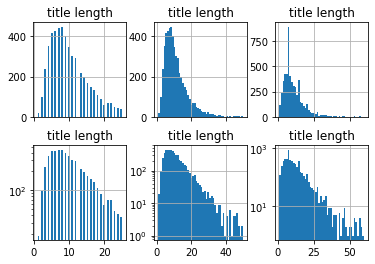

In [36]:
fig, ax = plt.subplots(2, 3, sharex='col' )
#histograms of title length (no of characters)
log_value=False
column_value='title length'
max_value={0:25,1:50,2:100,}
for i in range(2):
    for j in range(3):
        reddit_posts_text_comments_more_than_20_and_score_more_than_50[reddit_posts_text_comments_more_than_20_and_score_more_than_50[column_value].between(0,max_value.get(j))].hist(column=column_value,bins=50, log=log_value, ax=ax[i,j])        
    log_value = not log_value 

#reddit_posts_text_comments_more_than_20_and_score_more_than_50[reddit_posts_text_comments_more_than_20_and_score_more_than_50['body length'].between(0,100)].hist('title length', bins=100)
#reddit_posts_text_comments_more_than_20_and_score_more_than_50[reddit_posts_text_comments_more_than_20_and_score_more_than_50['body length'].between(0,1000)].hist('title length', bins=100)
#reddit_posts_text_comments_more_than_20_and_score_more_than_50[reddit_posts_text_comments_more_than_20_and_score_more_than_50['body length'].between(0,2000)].hist('title length', bins=100)


Let's attempt simple linear regression to quantify the relationship between log(score) and log(number of comments). This information 

In [21]:
#drop irrelevant columns and log required data in dataframe
reddit_posts_text_for_linear_regression=reddit_posts_text.drop(columns=['url','body','title', 'Day number of week', 'Day of month'])
reddit_posts_text_for_linear_regression=pd.get_dummies(reddit_posts_text_for_linear_regression,columns=['Day of week'])
text_for_lin_reg_score_comments_logged=reddit_posts_text_for_linear_regression.copy()
text_for_lin_reg_score_comments_logged=text_for_lin_reg_score_comments_logged[text_for_lin_reg_score_comments_logged['score']>0]
text_for_lin_reg_score_comments_logged=text_for_lin_reg_score_comments_logged[text_for_lin_reg_score_comments_logged['No of comments']>0]
columns=['score','No of comments']
for column in columns:
    text_for_lin_reg_score_comments_logged[column] = np.log10(text_for_lin_reg_score_comments_logged[column])  




In [22]:
#import models
from sklearn import linear_model
from sklearn.model_selection import train_test_split
linreg = linear_model.LinearRegression() 

In [23]:
x=text_for_lin_reg_score_comments_logged.copy()
y=text_for_lin_reg_score_comments_logged.copy()
x.reset_index(inplace=True)
y.reset_index(inplace=True)
x=pd.DataFrame(x['score'])
y=pd.DataFrame(y['No of comments'])

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
linreg = linear_model.LinearRegression() 
linreg.fit(x_train,y_train)
print(linreg.score(x_test,y_test))
print(linreg.coef_)

#result printed for lin reg y = no of comments, x = score

0.6973527570093738
[[0.64424118]]


In [25]:
x=text_for_lin_reg_score_comments_logged.copy()
y=text_for_lin_reg_score_comments_logged.copy()
x.reset_index(inplace=True)
y.reset_index(inplace=True)
y=pd.DataFrame(y['score'])
x=pd.DataFrame(x['No of comments'])

x_train, x_test, y_train, y_test = train_test_split(x, y)
linreg = linear_model.LinearRegression() 
linreg.fit(x_train,y_train)
print(linreg.score(x_test,y_test))
print(linreg.coef_)
#result printed for lin reg  y = score, x = no of comments,

0.7087153648582787
[[1.10497511]]


Above linear regression best fit lines could be used to set threshold levels to ascertain whether a post's score has been manipulated (as the number of comments may be far from the expected amount etc)

Let's attempt K-Means clustering for the text title

In [26]:
reddit_posts_text=pd.get_dummies(reddit_posts_text,columns=['Day of week'])
reddit_posts_text_min_max_scaled=reddit_posts_text.copy()
columns=['score','No of comments', 'body length', 'title length']
for column in columns:
    reddit_posts_text_min_max_scaled[column] = (reddit_posts_text_min_max_scaled[column] - reddit_posts_text_min_max_scaled[column].min()) / (reddit_posts_text_min_max_scaled[column].max() - reddit_posts_text_min_max_scaled[column].min())     



In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/loganvasudeva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/loganvasudeva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/loganvasudeva/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/loganvasudeva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
import contractions
import inflect
import string
import unicodedata
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def my_pre_process(sentence):
    words=replace_contractions(sentence)
    #words = nltk.word_tokenize(sentence)
    #words=replace_numbers(sentence)
    words=to_lowercase(words)
    #print(words)
    words="".join(words)
    #print(words)
    words="".join(words)


    words=replace_numbers(words)
    #print(words)
    words="".join(words)
    #print(words)
    return words
    
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def remove_punc_and_tidy(tokenised_words):
    output_list=[]
    #print(tokenised_words)
    for word in tokenised_words:
        #print(word)
        output = [char for char in word if char not in string.punctuation]
        #print(output)
        #ouput = ''.join([i for i in output if not i.isdigit()])
        output_word = output
        output_word = ''.join([i for i in output_word if not i.isdigit()])
       #print(output_word)
        if output_word != "":
            output_list.append(output_word)
    return output_list    

def lemmatize(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas
    
def my_tokeniser(sentence):
    words = nltk.word_tokenize(sentence)
    words=remove_stopwords(words)
    words=remove_non_ascii(words)
    words=remove_punc_and_tidy(words)
    lemmas = lemmatize(words)
    return lemmas

def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

#below is test code to see if functions are working
#custom_vec_test = CountVectorizer(preprocessor=my_pre_process, tokenizer=my_tokeniser)
#sentence="Hey There! This is a Sample review, which happens  to contain 456 films. This happened on Tuesday"
#cwm_test = custom_vec_test.fit_transform([sentence])
#print(cwm_test)
#tokens_test = custom_vec_test.get_feature_names()
#print(tokens_test)
#print(wm2df(cwm_test, tokens_test))

In [30]:
from sklearn.cluster import KMeans

Iteration 1 in for loop
Iteration 2 in for loop
Iteration 3 in for loop
Iteration 4 in for loop
Iteration 5 in for loop
Iteration 6 in for loop
Iteration 7 in for loop
Iteration 8 in for loop
Iteration 9 in for loop
Iteration 10 in for loop
Iteration 11 in for loop
Iteration 12 in for loop
Iteration 13 in for loop


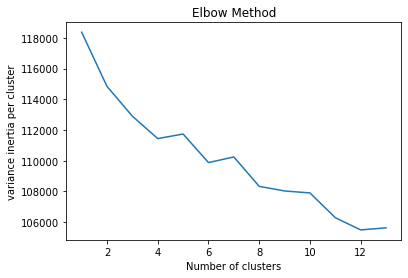

In [31]:
custom_vec = CountVectorizer(preprocessor=my_pre_process, tokenizer=my_tokeniser)
cwm = custom_vec.fit_transform(reddit_posts_text_min_max_scaled['title'].values)
#print(cwm)
tokens = custom_vec.get_feature_names()
#print(tokens)
body_text_tokensised_dataframe=wm2df(cwm,tokens)
model_list=[]
inertia_variance = []
for i in range(1,14):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    model_list.append(kmeans.fit(body_text_tokensised_dataframe))
    inertia_variance.append(kmeans.inertia_)
    print("Iteration " + str(i)+ " in for loop")
#Plot the graph
plt.plot(range(1,14),inertia_variance)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('variance inertia per cluster')
plt.show()

In [39]:
word_features = custom_vec.get_feature_names()
#seeing at it when it's clustered into 4 clusters
x_clusters=model_list[4-1]
wc=x_clusters.cluster_centers_.argsort()[:,-1:-26:-1]
for number, centroid in enumerate(wc):
    print(str(number) + ' = ' + ', '.join(word_features[word] for word in centroid))

0 = buy, amc, hold, dip, stock, sell, robinhood, go, share, nok, let, still, bb, us, fuck, time, trade, gme, allow, get, short, gamestop, one, want, block
1 = robinhood, hold, go, stock, short, amc, get, sell, trade, us, fuck, dd, market, let, make, wsb, squeeze, need, one, today, like, money, still, moon, time
2 = ag, zyxi, frankfurt, freak, fraudulent, frauds, fraud, frat, frantically, frankly, franklin, frank, freddie, frame, fracture, fractional, fraction, fractals, fr, fp, freakin, free, foxa, freeTM, fresenius
3 = gme, buy, amc, hold, short, go, sell, share, stock, robinhood, bb, get, still, trade, nok, squeeze, us, price, let, allow, moon, today, one, like, think


------------------------------